# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set() 

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv('Example-bank-data.csv')

We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [3]:
raw_data.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


In [4]:
data = raw_data.copy()
data['y'] = raw_data['y'].map({'yes':1, 'no':0})

### Declare the dependent and independent variables

In [5]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


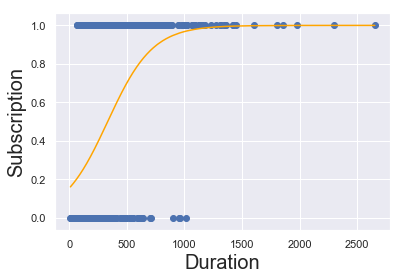

In [7]:
plt.scatter(x1, y)
b0 = reg_log.params[0]
b1 = reg_log.params[1]
y_hat = np.exp(b0+b1*x1) / (1+np.exp(b0+b1*x1))
x1 = np.sort(x1)
y_hat = np.sort(y_hat)

plt.plot(x1, y_hat, c='orange')
plt.xlabel('Duration', fontsize=20)
plt.ylabel('Subscription', fontsize=20)
plt.show()